# 18CSC402 Deep Learning 
CB.SC.I5DAS18044
Uthara Koliyot

# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# PROBLEM STATEMENT

- In this case study, I am trying to train a Deep Network Model to classify traffic sign images
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


# STEP 1: IMPORT LIBRARIES AND DATASET

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt # 
import random

In [3]:

with open("/content/drive/MyDrive/Project 5/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/MyDrive/Project 5/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/Project 5/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

# STEP 2: IMAGE EXPLORATION

36

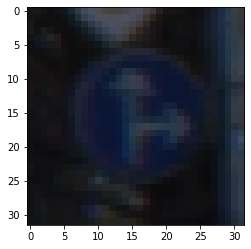

In [7]:
i = 1001
plt.imshow(X_train[i]) 
y_train[i]

# STEP 3: DATA PEPARATION

In [8]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [9]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [10]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

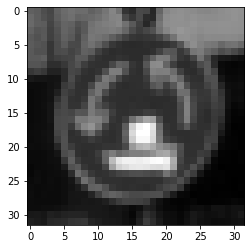

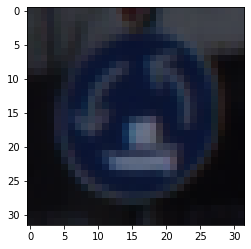

In [12]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

# STEP 4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6



- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [13]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [14]:
image_shape = X_train_gray[i].shape

# Model 3


In [15]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=24, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=480, activation='relu'))
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=43, activation = 'softmax'))


In [16]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=20,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/20
70/70 [==============================] - 41s 571ms/step - loss: 2.0376 - accuracy: 0.4741 - val_loss: 0.9892 - val_accuracy: 0.7141
Epoch 2/20
70/70 [==============================] - 40s 574ms/step - loss: 0.4711 - accuracy: 0.8763 - val_loss: 0.5424 - val_accuracy: 0.8483
Epoch 3/20
70/70 [==============================] - 40s 572ms/step - loss: 0.2283 - accuracy: 0.9456 - val_loss: 0.3771 - val_accuracy: 0.9000
Epoch 4/20
70/70 [==============================] - 40s 571ms/step - loss: 0.1332 - accuracy: 0.9709 - val_loss: 0.4575 - val_accuracy: 0.8839
Epoch 5/20
70/70 [==============================] - 40s 572ms/step - loss: 0.0929 - accuracy: 0.9809 - val_loss: 0.3814 - val_accuracy: 0.9077
Epoch 6/20
70/70 [==============================] - 40s 569ms/step - loss: 0.0630 - accuracy: 0.9878 - val_loss: 0.3635 - val_accuracy: 0.9082
Epoch 7/20
70/70 [==============================] - 40s 567ms/step - loss: 0.0462 - accuracy: 0.9915 - val_loss: 0.3610 - val_accuracy: 0.9068

# STEP 5: MODEL EVALUATION

In [18]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9184


In [19]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))

Test Loss : 0.6445


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

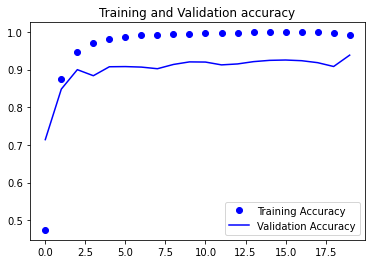

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


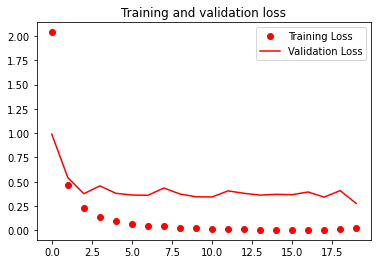

In [22]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted = cnn_model.predict(X_test_gray_norm)
predicted_classes =np.argmax(predicted,axis=1)
y_true = y_test

In [24]:
predicted_classes

array([16,  1, 38, ...,  6,  8, 10])

In [25]:
predicted_classes

array([16,  1, 38, ...,  6,  8, 10])

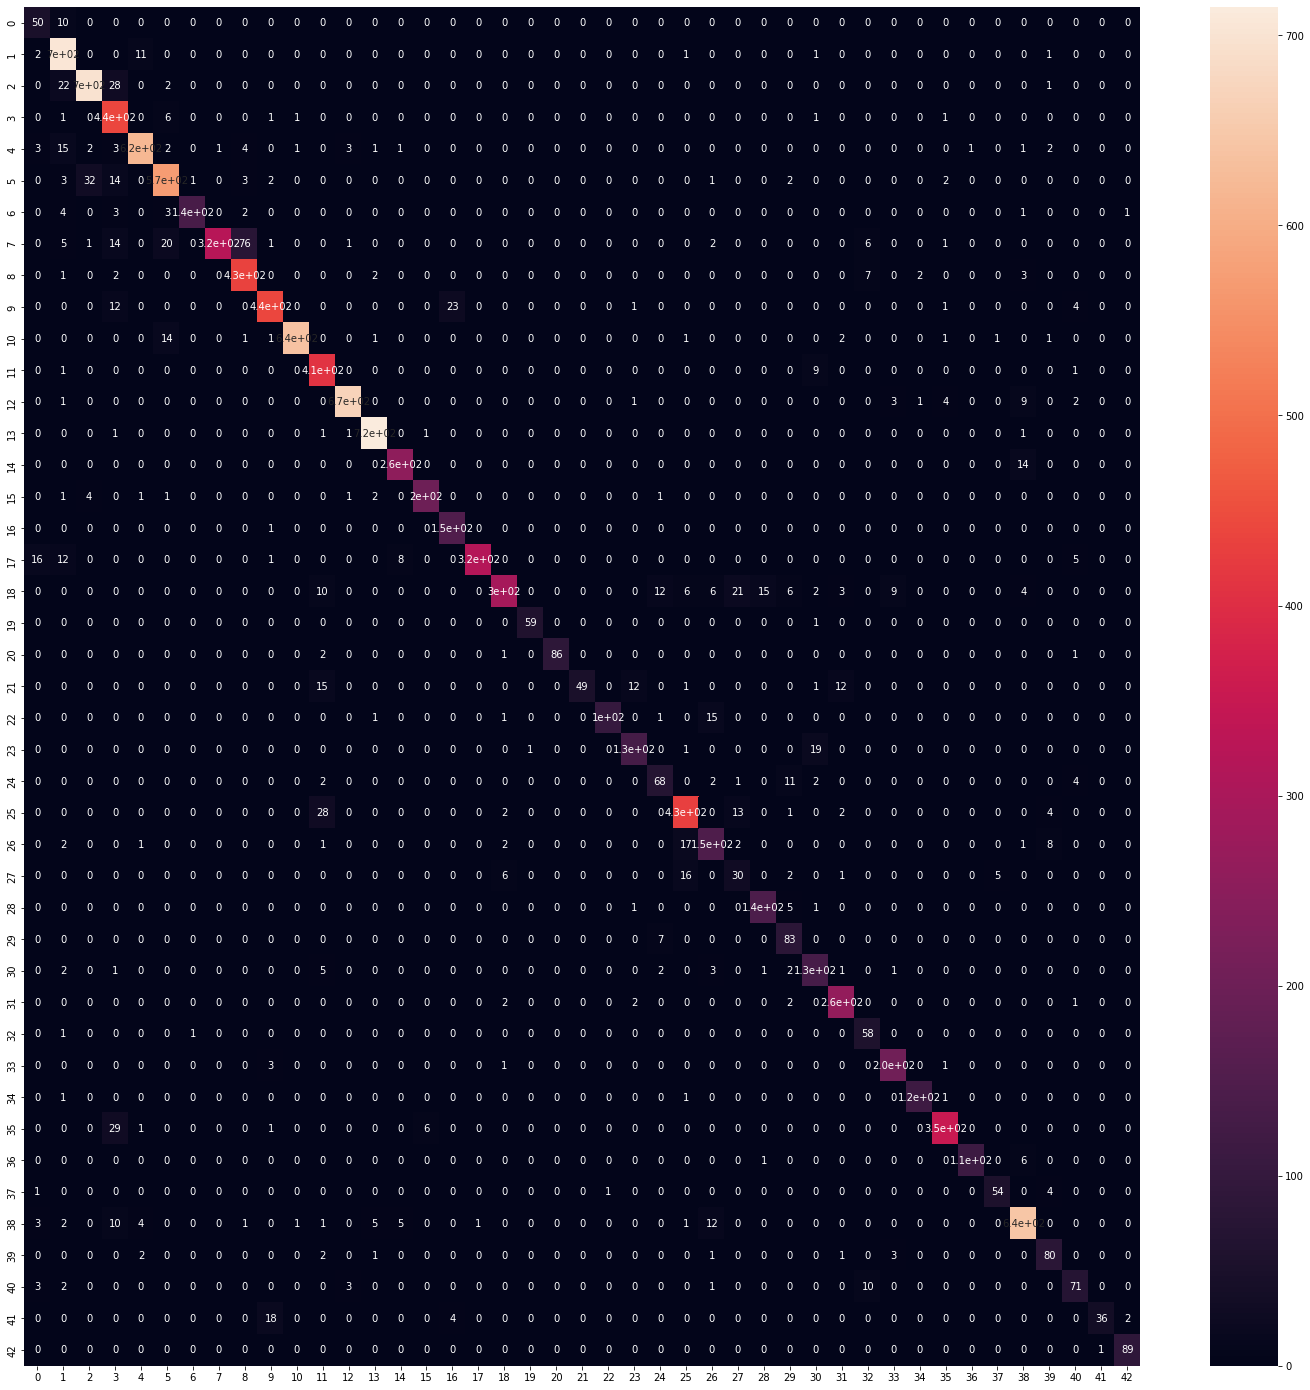

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

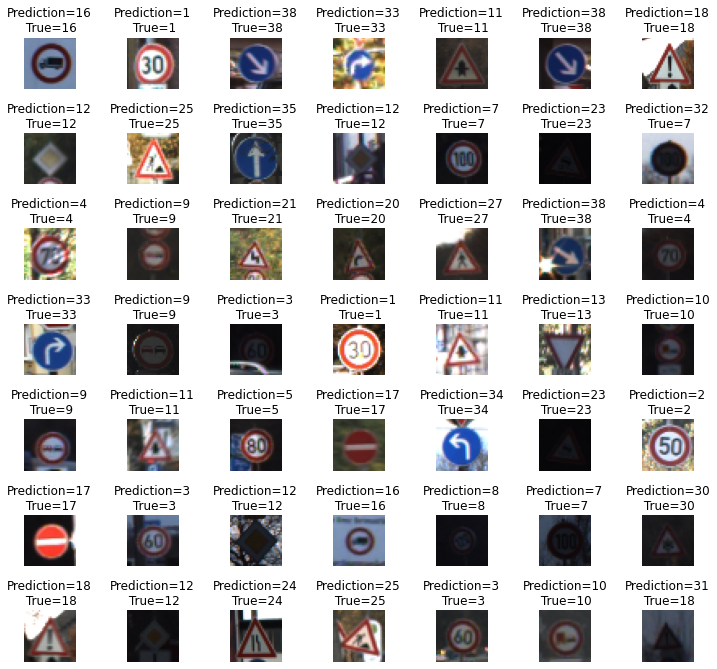

In [27]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)